In [70]:
import torch
import matplotlib.pyplot as plt
from utils import now_stamp
plt.style.use("ggplot")

In [71]:
class ComparisonModel:
    def __init__(self, name='MGP-BDI', color='tomato', dir_path='/Users/hanbit-o/code/Visualization_wall_avoidance_results/Data/Result...'):
        self.color = color
        self.name = name
        self.dir_path = dir_path
        yd_string, time_string = now_stamp()
        self.ID = yd_string + time_string
        # e.g., dir_path = /Users/hanbit-o/code/Visualization_wall_avoidance_results/Data/Result/ObstacleAvoidance/MHGP-BDI/0

    def test_results(self, ID):
        test_dataset = torch.load(self.dir_path + '/' + ID + '/_random/test_results.pickle')
        self.success_rate = test_dataset['success_rate']
        self.test_results= torch.stack(test_dataset['test_results']).float()*100
        self.success_rate['std'] = torch.stack([self.test_results[i*2:i*2+2].mean() for i in range(int(self.test_results.shape[0]/2))]).std()
        print(test_dataset.keys())

# ObstacleAvoidance

In [72]:
mhgp_bdi = ComparisonModel(name="MHGP-BDI",
color="tomato",
dir_path="/Users/hanbit-o/code/Visualization_wall_avoidance_results/Data/Result/ObstacleAvoidance/MHGP-BDI/0")
mhgp_bdi.test_results(ID="3/20210901_112038")

mhgp_bc = ComparisonModel(name="MGP-BC",
    color='navy',
    dir_path="/Users/hanbit-o/code/Visualization_wall_avoidance_results/Data/Result/ObstacleAvoidance/MHGP-BC/0")
mhgp_bc.test_results(ID="3/20210901_113538")

dict_keys(['test_results', 'success_rate', 'Trajectories'])
dict_keys(['test_results', 'success_rate', 'Trajectories'])


In [73]:
print(mhgp_bdi.success_rate)
print(mhgp_bc.success_rate)

{'mean': tensor(100.), 'std': tensor(0.)}
{'mean': tensor(70.), 'std': tensor(27.3861)}


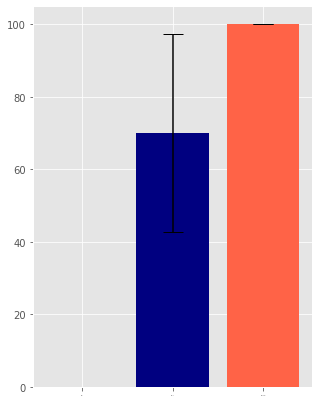

In [96]:
plt.figure(figsize=(5,7))
bar_mgp_bdi = plt.bar(["MGP"],[torch.zeros(1)],yerr=torch.zeros(1),capsize = 10,color="black")
bar_mhgp_bc = plt.bar([mhgp_bc.name],[mhgp_bc.success_rate['mean']],yerr=mhgp_bc.success_rate['std'],capsize = 10,color=mhgp_bc.color)
bar_mhgp_bdi = plt.bar([mhgp_bdi.name],[mhgp_bdi.success_rate['mean']],yerr=mhgp_bdi.success_rate['std'],capsize = 10,color=mhgp_bdi.color)
plt.xticks(fontsize=0)
plt.savefig("/Users/hanbit-o/code/Visualization_wall_avoidance_results/Figures/Obstacle_Avoidance/Performance/"+mhgp_bc.ID+".png")

# 

# ShaftInsertion

In [76]:
mhgp_bdi = ComparisonModel(name="MHGP-BDI",
color="tomato",
dir_path="/Users/hanbit-o/code/Visualization_wall_avoidance_results/Data/Result/ShaftInsertion/MHGP-BDI/0")
mhgp_bdi.test_results(ID="5/20210831_185113")

mhgp_bc = ComparisonModel(name="MGP-BC",
    color='navy',
    dir_path="/Users/hanbit-o/code/Visualization_wall_avoidance_results/Data/Result/ShaftInsertion/MHGP-BC/0")
mhgp_bc.test_results(ID="5/20210831_184520")

dict_keys(['test_results', 'success_rate', 'Trajectories'])
dict_keys(['test_results', 'success_rate', 'Trajectories'])


In [77]:
print(mhgp_bdi.success_rate)
print(mhgp_bc.success_rate)

{'mean': tensor(100.), 'std': tensor(0.)}
{'mean': tensor(70.), 'std': tensor(27.3861)}


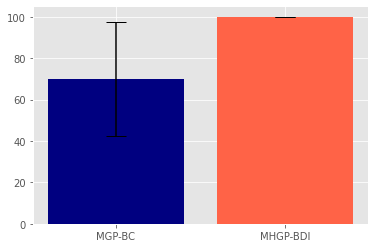

In [79]:
bar_mhgp_bc = plt.bar([mhgp_bc.name],[mhgp_bc.success_rate['mean']],yerr=mhgp_bc.success_rate['std'],capsize = 10,color=mhgp_bc.color)
bar_mhgp_bdi = plt.bar([mhgp_bdi.name],[mhgp_bdi.success_rate['mean']],yerr=mhgp_bdi.success_rate['std'],capsize = 10,color=mhgp_bdi.color)
plt.savefig("/Users/hanbit-o/code/Visualization_wall_avoidance_results/Figures/ShaftInsertion/Performance/"+mhgp_bc.ID+".png")